1.	Go to https://www.bls.gov/developers/api_python.htm, try to understand the sample code to retrieve BLS data series using API Version 1.

You may find the format of SeriesID here https://www.bls.gov/help/hlpforma.htm#CE
Based on the SeriesID definitions, retrieve the following data:

Seasonally adjusted (Seasonal Adjustment code) Average weekly earnings of all employees (Data type code) of Manufacturing, financial activities and Professional and business services (Super Sector Code) from Year 1980 to 2018 from this section.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.tree.tests.test_export import w
import requests

In [59]:
#Geetting the series data
ids= ['CES3000000011', 'CES5500000011','CES6000000011']
f_names= [ ]
headers = {'Content-type': 'application/json'}
#Defining a function scrape data to get the data between years
def scrape_data(start_year,end_year):
    data = json.dumps({"seriesid": ids, "start_yearyear": start_year, "end_yearyear": end_year})
    p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    f_name=start_year+end_year+"data"+".json"
    f_names.append(f_name)
    with open(f_name, 'w') as outfile:
        json.dump(json_data, outfile)
#Defing the 10 year intervals to scrape data 
startyear_list=["1980","1990","2000","2010"]
endyear_list=["1989","1999","2009","2018"]
for i in range(len(startyear_list)):
    scrape_data(startyear_list[i],endyear_list[i])
    
f_names

['19801989data.json',
 '19901999data.json',
 '20002009data.json',
 '20102018data.json']

In [60]:
#Converting the retrieved outputs into two forms : 
#i) prettydataframe  : pdf 
#ii)pretty table : pt
import prettytable
pdf = pd.DataFrame(columns=["series id","year","period","value"])
pt=prettytable.PrettyTable(["series id","year","period","value"])




In [61]:
def get_prettydata(json_data):
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['periodName']
            value = item['value']
            pt.add_row([seriesId,year,period,value])
            pdf.loc[len(pdf)] =[seriesId,year,period,value]

get_prettydata

<function __main__.get_prettydata(json_data)>

In [64]:
for i in f_names:
    with open(i) as json_data:
        jl = json.load(json_data)
        print(jl)
        get_prettydata(jl)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 271, 'message': ['No Data Available for Series CES3000000011 Year: 1980', 'No Data Available for Series CES3000000011 Year: 1981', 'No Data Available for Series CES3000000011 Year: 1982', 'No Data Available for Series CES3000000011 Year: 1983', 'No Data Available for Series CES3000000011 Year: 1984', 'No Data Available for Series CES3000000011 Year: 1985', 'No Data Available for Series CES3000000011 Year: 1986', 'No Data Available for Series CES3000000011 Year: 1987', 'No Data Available for Series CES3000000011 Year: 1988', 'No Data Available for Series CES3000000011 Year: 1989', 'No Data Available for Series CES5500000011 Year: 1980', 'No Data Available for Series CES5500000011 Year: 1981', 'No Data Available for Series CES5500000011 Year: 1982', 'No Data Available for Series CES5500000011 Year: 1983', 'No Data Available for Series CES5500000011 Year: 1984', 'No Data Available for Series CES5500000011 Year: 1985', 'No Data Available for 

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 236, 'message': [], 'Results': {'series': [{'seriesID': 'CES3000000011', 'data': [{'year': '2018', 'period': 'M12', 'periodName': 'December', 'value': '1117.80', 'footnotes': [{}]}, {'year': '2018', 'period': 'M11', 'periodName': 'November', 'value': '1111.39', 'footnotes': [{}]}, {'year': '2018', 'period': 'M10', 'periodName': 'October', 'value': '1108.13', 'footnotes': [{}]}, {'year': '2018', 'period': 'M09', 'periodName': 'September', 'value': '1110.03', 'footnotes': [{}]}, {'year': '2018', 'period': 'M08', 'periodName': 'August', 'value': '1111.51', 'footnotes': [{}]}, {'year': '2018', 'period': 'M07', 'periodName': 'July', 'value': '1108.23', 'footnotes': [{}]}, {'year': '2018', 'period': 'M06', 'periodName': 'June', 'value': '1105.53', 'footnotes': [{}]}, {'year': '2018', 'period': 'M05', 'periodName': 'May', 'value': '1100.38', 'footnotes': [{}]}, {'year': '2018', 'period': 'M04', 'periodName': 'April', 'value': '1104.95', 'footnot

In [65]:
#Printing the prettytable
print(pt)

+---------------+------+-----------+---------+
|   series id   | year |   period  |  value  |
+---------------+------+-----------+---------+
| CES3000000011 | 2009 |  December |  918.26 |
| CES3000000011 | 2009 |  November |  918.32 |
| CES3000000011 | 2009 |  October  |  908.62 |
| CES3000000011 | 2009 | September |  906.70 |
| CES3000000011 | 2009 |   August  |  903.99 |
| CES3000000011 | 2009 |    July   |  898.59 |
| CES3000000011 | 2009 |    June   |  890.87 |
| CES3000000011 | 2009 |    May    |  887.80 |
| CES3000000011 | 2009 |   April   |  891.65 |
| CES3000000011 | 2009 |   March   |  887.80 |
| CES3000000011 | 2009 |  February |  893.49 |
| CES3000000011 | 2009 |  January  |  885.36 |
| CES3000000011 | 2008 |  December |  884.83 |
| CES3000000011 | 2008 |  November |  890.44 |
| CES3000000011 | 2008 |  October  |  890.87 |
| CES3000000011 | 2008 | September |  881.50 |
| CES3000000011 | 2008 |   August  |  886.98 |
| CES3000000011 | 2008 |    July   |  882.99 |
| CES30000000

In [66]:
#Look at head of the pretty data frame
pdf.head()
pdf['value'] = pdf['value'].astype(float)
pdf.head()

,series id,year,period,value
0,CES3000000011,2009,December,918.26
1,CES3000000011,2009,November,918.32
2,CES3000000011,2009,October,908.62
3,CES3000000011,2009,September,906.70
4,CES3000000011,2009,August,903.99


In [67]:

from datetime import datetime


In [68]:
#Creating a new variable date for better visualization and trend analysis 
dt=[ ]
for i in range(len(pdf)):
    s = pdf['year'][i]+", "+pdf['period'][i]
    d = datetime.strptime(s, '%Y, %B')
    dt.append(d)
pdf['date']=pd.Series(dt)

In [69]:
pdf.head()

,series id,year,period,value,date
0,CES3000000011,2009,December,918.26,2009-12-01
1,CES3000000011,2009,November,918.32,2009-11-01
2,CES3000000011,2009,October,908.62,2009-10-01
3,CES3000000011,2009,September,906.70,2009-09-01
4,CES3000000011,2009,August,903.99,2009-08-01


In [70]:
#Convert the pretty data frame into a csv file and store it.
pdf.to_csv(r'C:\Data Analytics\ScrapedBLSdataPhani.csv',index=True)

In [71]:
#Visualizing using Seaborn 
import seaborn as sns

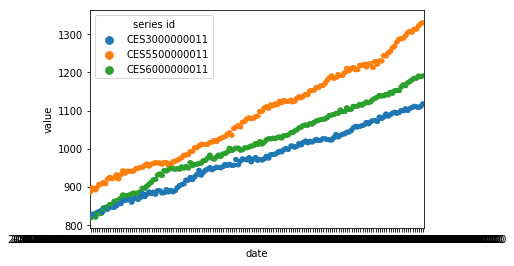

In [76]:
snsplot= sns.swarmplot(x='date', y='value',hue='series id', data=pdf)

 ##The seaborn plotshows that the weekly earnings of all 3 industries namely ,financial activities,manufacturing and Professional and business services are all increasing steadily over the years.
 #Also, the weekly earnings of employees in the financial activities is the highest among all the 3 sectors, followed by employees in the professional and business services.

# Q2) 
#Download “Player_Attributes.csv” from eLearning. Check the number of unique values of the two IDs 
#“player_fifa_api_id” and “player_api_id”. It turns out that the two numbers do not match. 
#What does this mean? Write a program to find the id combinations where “player_api_id” has multiple matches of “player_fifa_api_id”.

In [6]:
PA = pd.read_csv('Player_Attributes.csv')
PA.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
PA['player_fifa_api_id'].nunique()

11062

#Number of unique values of player_fifa_api_id is 11062

In [8]:
PA['player_api_id'].nunique()

11060

#Number of unique values of player_fifa_api_id is 11060 which means both the ids are not the same

In [35]:
idcombinations=PA[['player_api_id','player_fifa_api_id']]
idcombinations.drop_duplicates(keep='first', inplace=True)
idcombinations.head(10)


C:\Users\Phanindra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,player_api_id,player_fifa_api_id
0,505942,218353
5,155782,189615
38,162549,186170
64,30572,140161
87,23780,17725
112,27316,158138
139,564793,221280
146,30895,152747
172,528212,206592
179,101042,188621


In [47]:
idcombinations=PA.groupby(['player_api_id','player_fifa_api_id']).count().reset_index()


In [79]:

b=idcombinations.groupby(['player_api_id']).count().reset_index().sort_values('player_fifa_api_id')
c=idcombinations.groupby(['player_fifa_api_id']).count().reset_index().sort_values('player_api_id')


In [81]:
different=b[b['player_fifa_api_id']>1].player_api_id
newtable=list(different)

idcombinations[idcombinations['player_api_id'].isin(newtable)][['player_api_id','player_fifa_api_id']].sort_values('player_api_id')

,player_api_id,player_fifa_api_id
121,11285,202486
122,11285,208618
1737,30271,135804
1738,30271,206652
2334,32968,51384
2335,32968,118359
2998,37254,177485
2999,37254,190195
4284,42116,184431
4283,42116,158428


# There are 18 such combinations. While both player_api_id and player_fifa_api_id are numbers to identify different players and efficiently record every statistics, one player( player_api_id) could have played in multiple matches or one player must have played in different leagues hence different player_fifa_api_ids. That us why we have multiple records for one player_api_id

